In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape


(1000, 40)

In [5]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

21 features are categorical and 19 are numerical. Our target variable is categorical.

In [6]:
# View statistical properties of dataset 
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
# View column names 
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
# duplicate columns
df.duplicated().sum()

0

In [9]:
# Number of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
# drop policy_number','incident_location' column   as it will not affect the data
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [11]:
# unique Values
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [12]:
df.replace('?',np.NaN,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [13]:
# No. of Missing Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

In [14]:
# drop '_c39'column as it has all nan values
df.drop(['_c39'],axis=1,inplace=True)

In [15]:
# Lets fill the null values for collision type.
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [16]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [17]:
# change to datetime
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

In [18]:
# drop policy_bind_date column
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [19]:
# grouping categorical columns
cat = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num = [y for y in df.columns if df[y].dtypes!='O']

In [20]:
cat

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [21]:
num

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'Month',
 'Year',
 'Day']

In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,6510,13020,52080,10.0,1.0,2004,1.0,10,2014,17
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,780,780,3510,8.0,12.0,2007,1.0,6,2006,27
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,7700,3850,23100,4.0,30.0,2007,0.0,6,2000,9
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,6340,6340,50720,3.0,34.0,2014,1.0,5,1990,25
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,1300,650,4550,0.0,31.0,2009,0.0,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,17440,8720,61040,6.0,6.0,2006,0.0,7,1991,16
996,285,41,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,18080,18080,72320,13.0,28.0,2015,0.0,5,2014,1
997,130,34,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,7500,7500,52500,11.0,19.0,1996,0.0,2,2003,17
998,458,62,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,5220,5220,36540,1.0,5.0,1998,0.0,11,2011,18


In [24]:
# statistical data horizontaly
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,6.559000,2001.604000,15.448000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,3.391758,7.360391,8.850176
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1990.000000,1.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,4.000000,1995.000000,8.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,7.000000,2002.000000,16.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,9.000000,2008.000000,23.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,12.000000,2015.000000,31.000000


Data Visualisation

<AxesSubplot:xlabel='age', ylabel='count'>

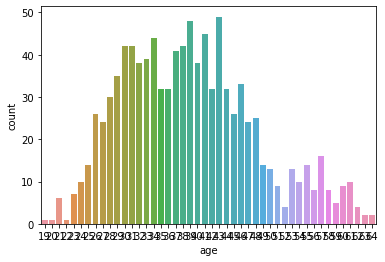

In [25]:
 sns.countplot(x='age',data=df)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

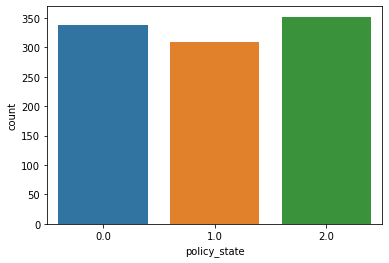

In [26]:
 sns.countplot(x='policy_state',data=df)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

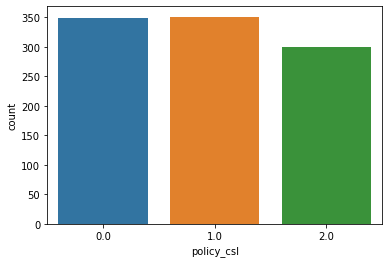

In [27]:
 sns.countplot(x='policy_csl',data=df)

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

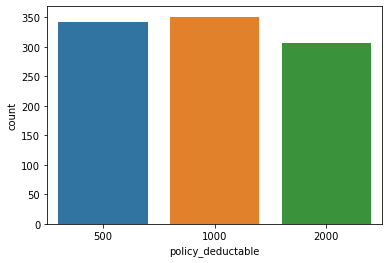

In [28]:
 sns.countplot(x='policy_deductable',data=df)

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

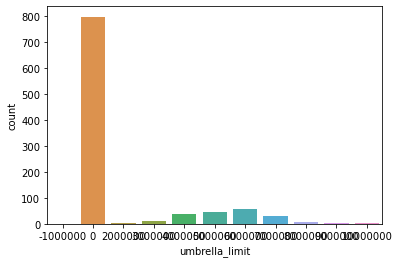

In [29]:
 sns.countplot(x='umbrella_limit',data=df)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

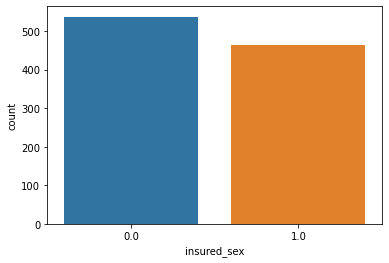

In [30]:
 sns.countplot(x='insured_sex',data=df)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

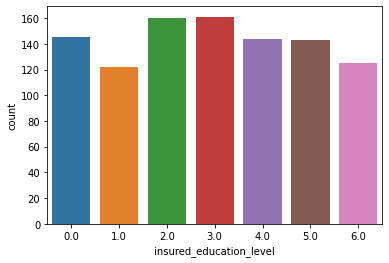

In [31]:
 sns.countplot(x='insured_education_level',data=df)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

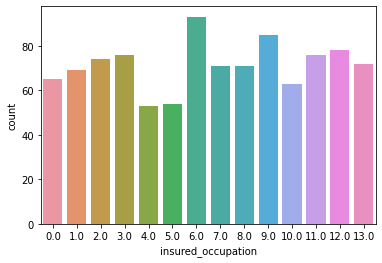

In [32]:
 sns.countplot(x='insured_occupation',data=df)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

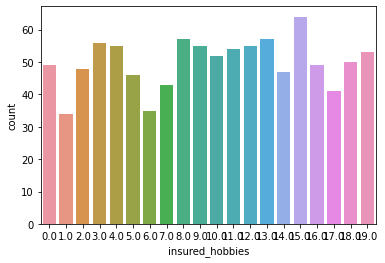

In [33]:
 sns.countplot(x='insured_hobbies',data=df)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

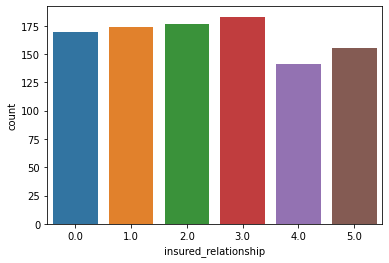

In [34]:
 sns.countplot(x='insured_relationship',data=df)

<AxesSubplot:xlabel='incident_date', ylabel='count'>

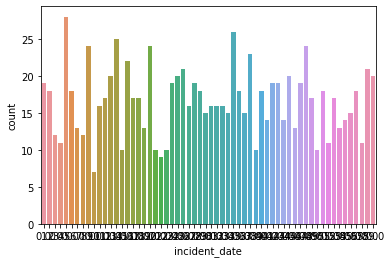

In [35]:
 sns.countplot(x='incident_date',data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

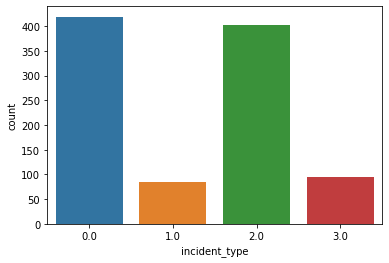

In [36]:
 sns.countplot(x='incident_type',data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

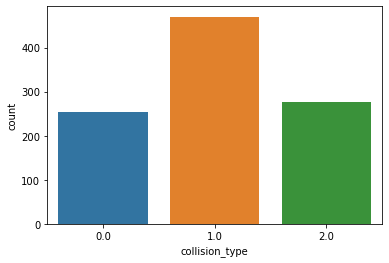

In [37]:
 sns.countplot(x='collision_type',data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

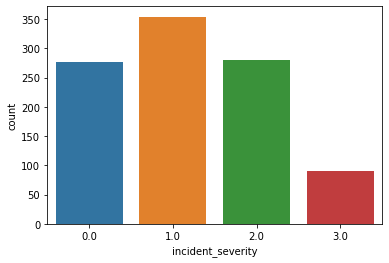

In [38]:
 sns.countplot(x='incident_severity',data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

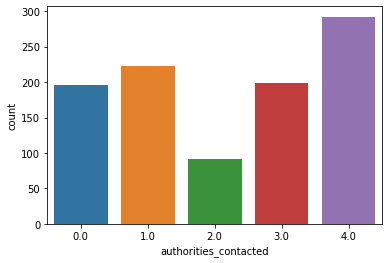

In [39]:
 sns.countplot(x='authorities_contacted',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

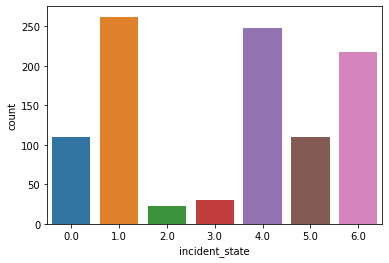

In [40]:
 sns.countplot(x='incident_state',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

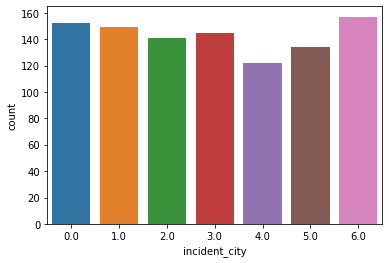

In [41]:
 sns.countplot(x='incident_city',data=df)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

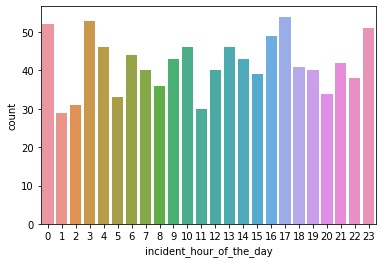

In [42]:
 sns.countplot(x='incident_hour_of_the_day',data=df)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

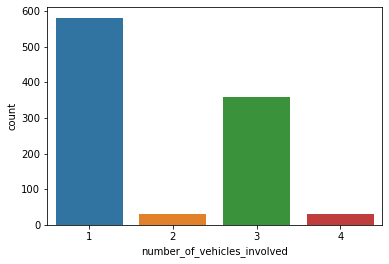

In [43]:
 sns.countplot(x='number_of_vehicles_involved',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

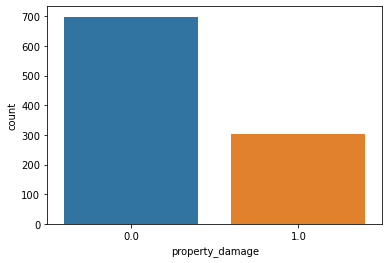

In [44]:
 sns.countplot(x='property_damage',data=df)

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

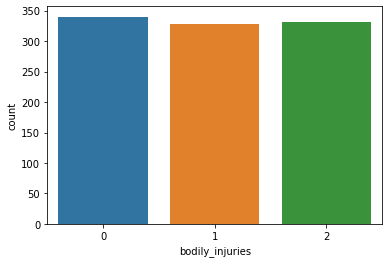

In [45]:
 sns.countplot(x='bodily_injuries',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

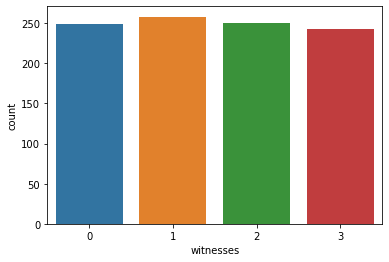

In [46]:
 sns.countplot(x='witnesses',data=df)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

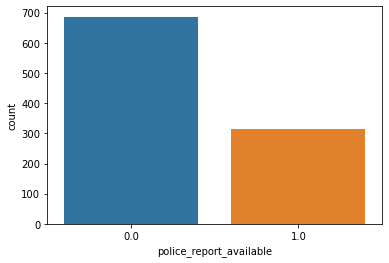

In [47]:
 sns.countplot(x='police_report_available',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

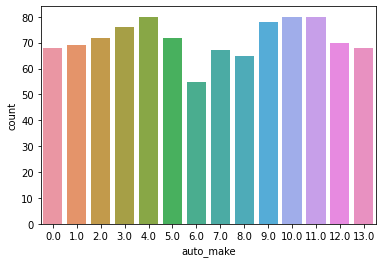

In [48]:
 sns.countplot(x='auto_make',data=df)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

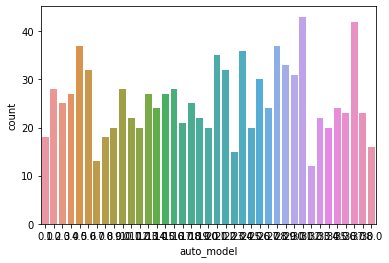

In [49]:
 sns.countplot(x='auto_model',data=df)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

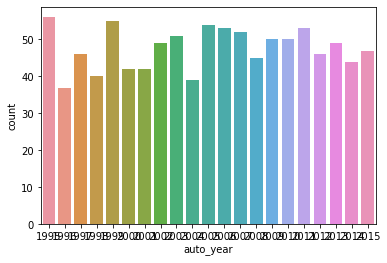

In [50]:
 sns.countplot(x='auto_year',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

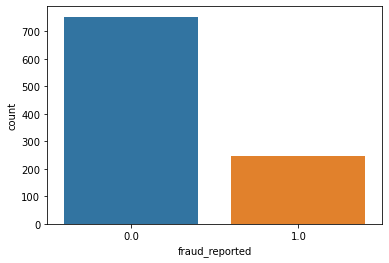

In [51]:
 sns.countplot(x='fraud_reported',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

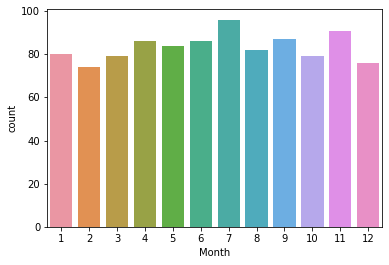

In [52]:
 sns.countplot(x='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='count'>

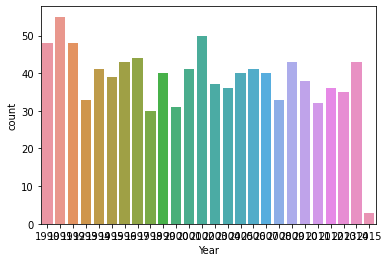

In [53]:
 sns.countplot(x='Year',data=df)

<AxesSubplot:xlabel='Day', ylabel='count'>

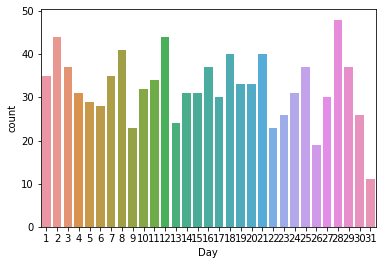

In [54]:
 sns.countplot(x='Day',data=df)

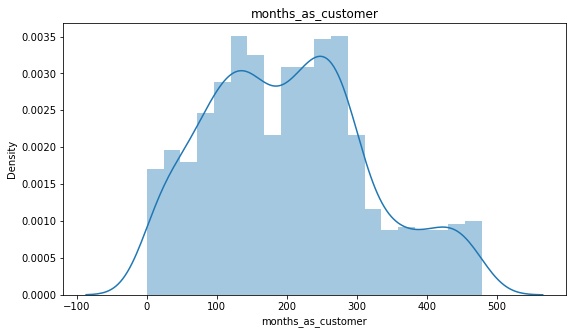

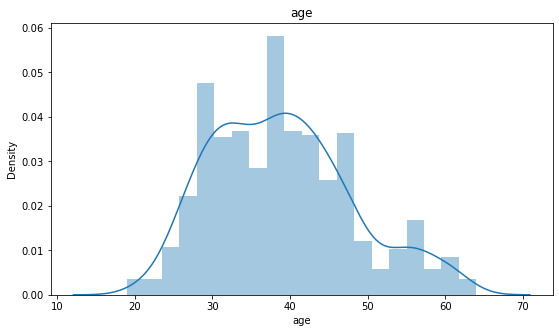

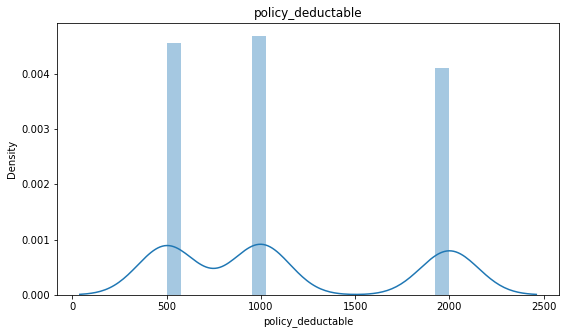

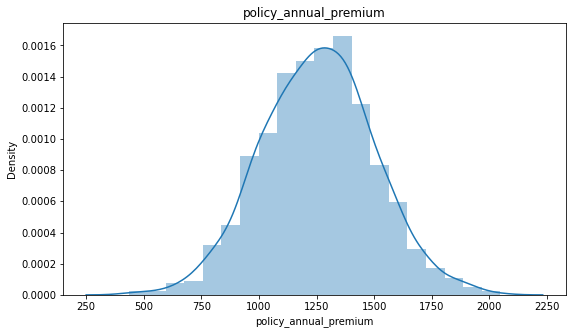

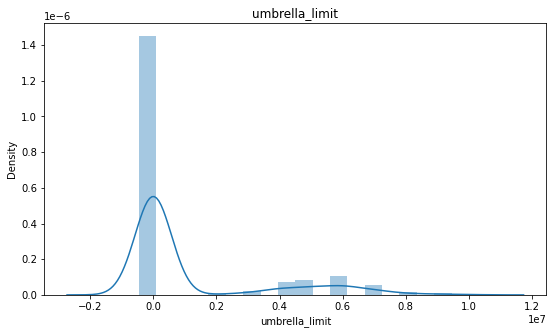

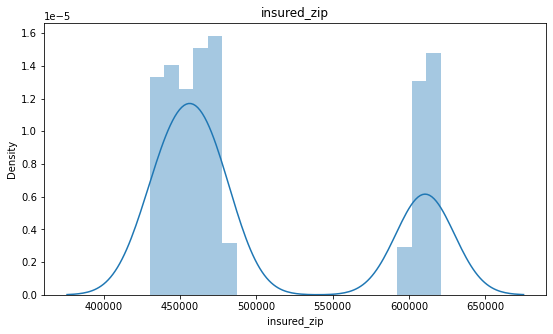

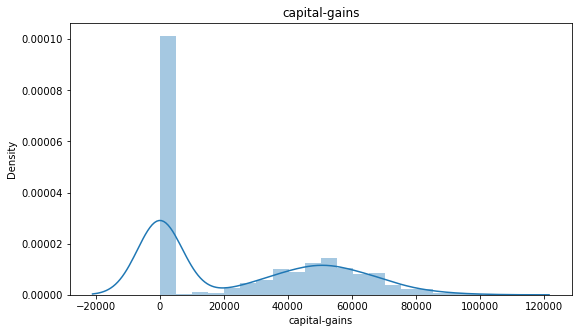

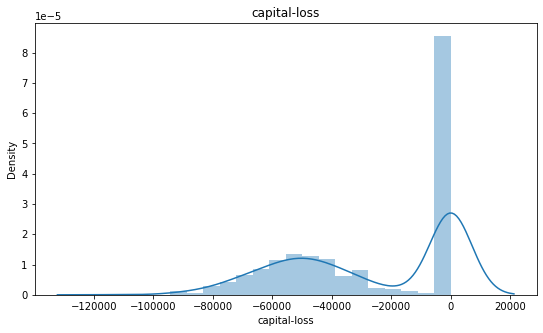

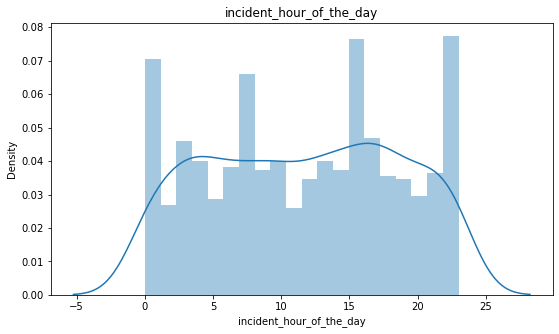

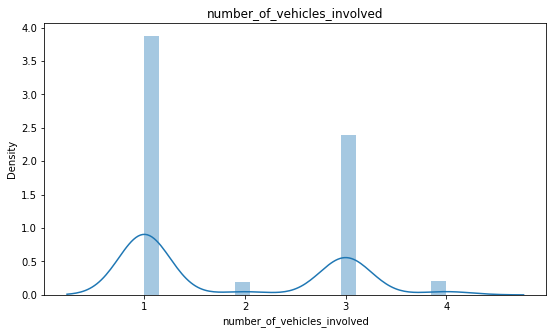

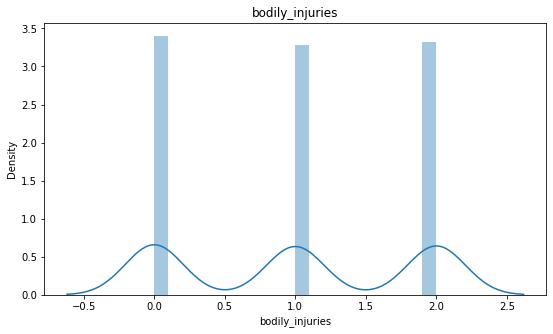

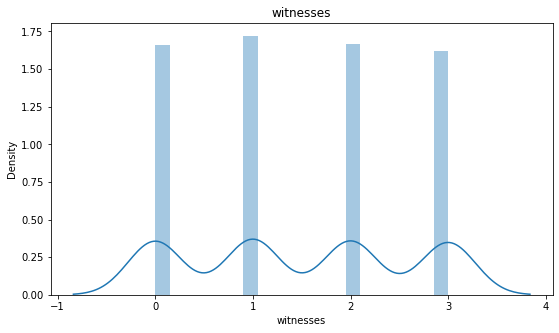

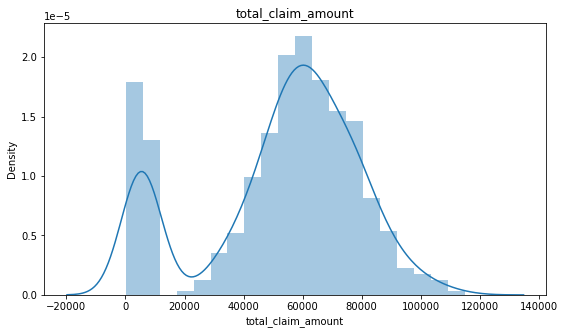

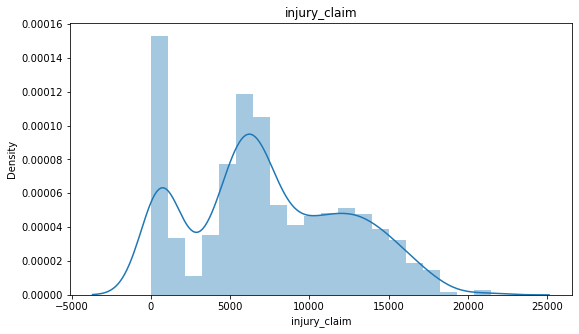

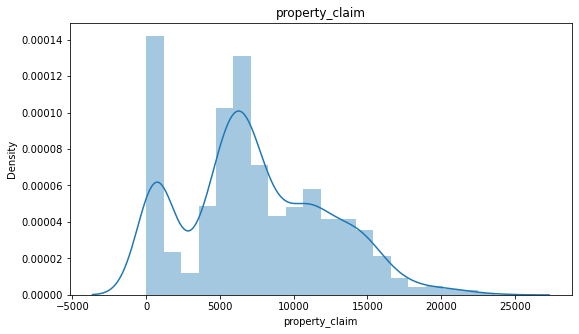

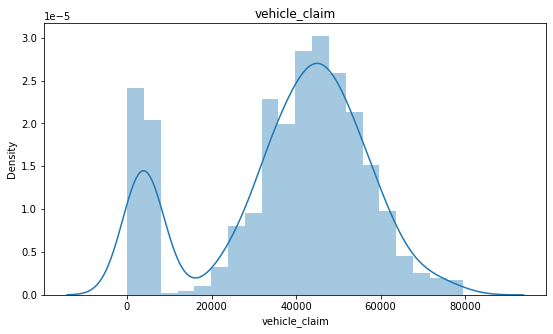

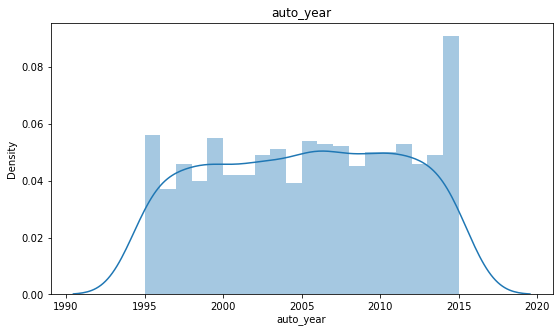

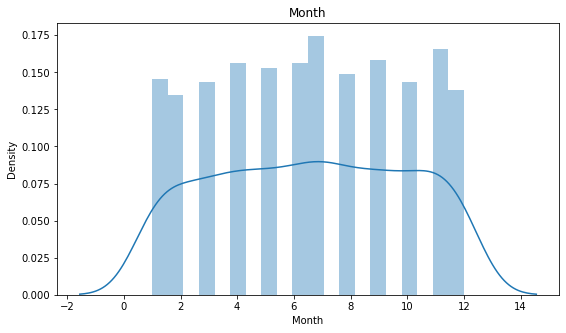

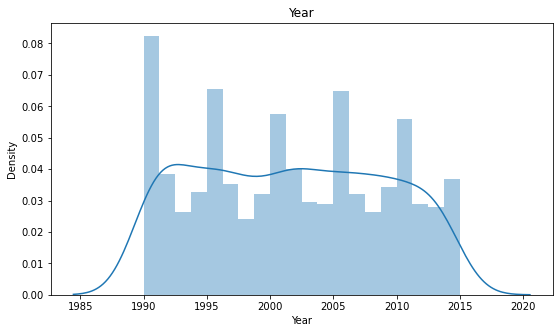

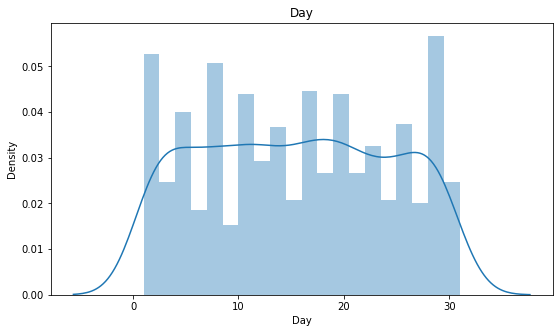

In [55]:
# lets visualize integer data using distplot
for i in df[num]:
  plt.figure(figsize=(9,5))
  sns.distplot(df[i], bins=20)
  plt.title(i)
  plt.show()

<AxesSubplot:ylabel='fraud_reported'>

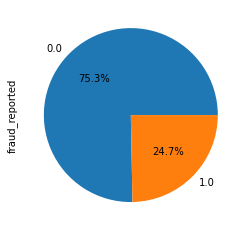

In [56]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')

<AxesSubplot:ylabel='police_report_available'>

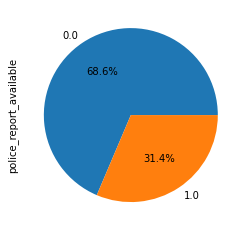

In [57]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')


<AxesSubplot:ylabel='insured_sex'>

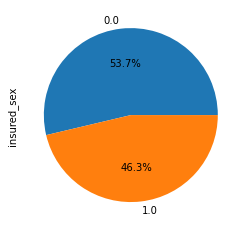

In [58]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')


<AxesSubplot:ylabel='incident_type'>

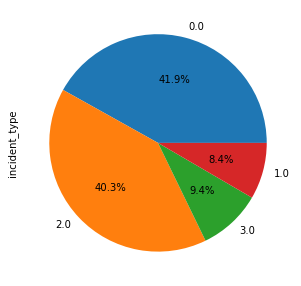

In [59]:
df['incident_type'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')


<AxesSubplot:ylabel='authorities_contacted'>

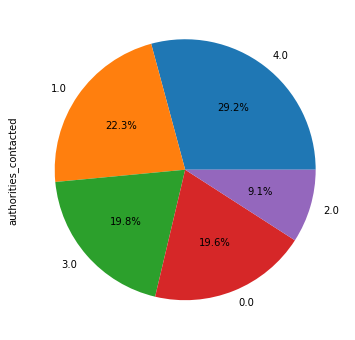

In [60]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')


<AxesSubplot:ylabel='witnesses'>

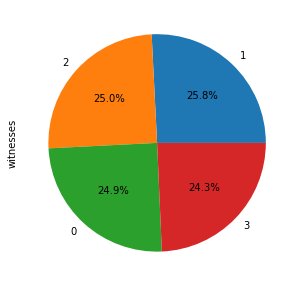

In [61]:
df['witnesses'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')


<AxesSubplot:ylabel='incident_state'>

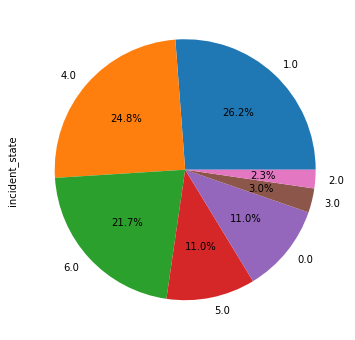

In [62]:
 df['incident_state'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')


<AxesSubplot:ylabel='incident_city'>

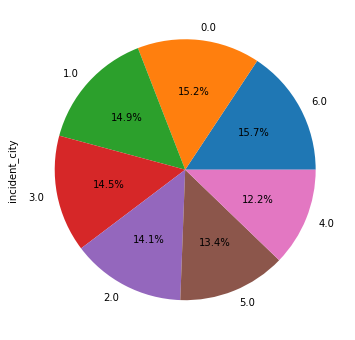

In [63]:
df['incident_city'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')


<AxesSubplot:ylabel='Month'>

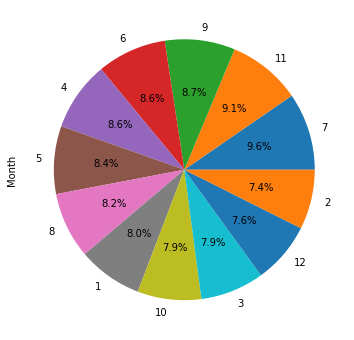

In [64]:
df['Month'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')


Bivariate Analysis

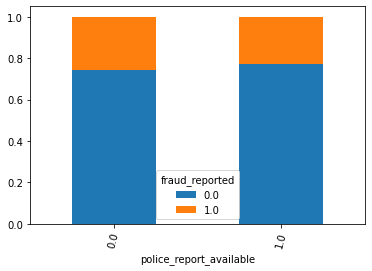

In [65]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

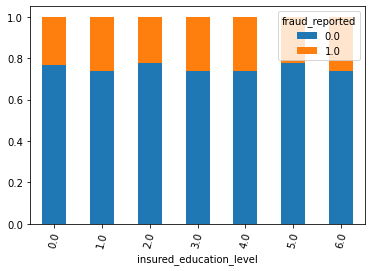

In [66]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

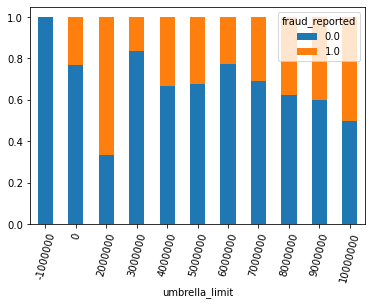

In [67]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

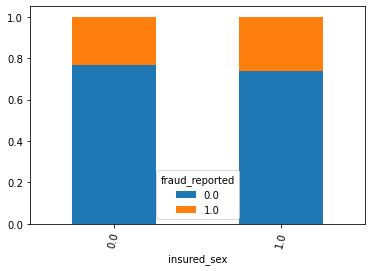

In [68]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

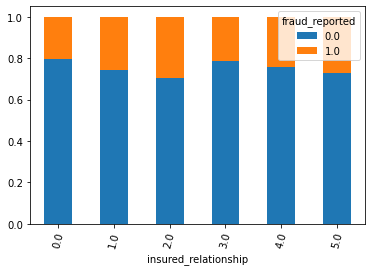

In [69]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

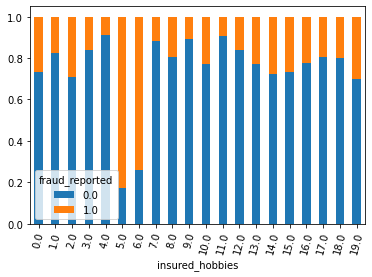

In [70]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

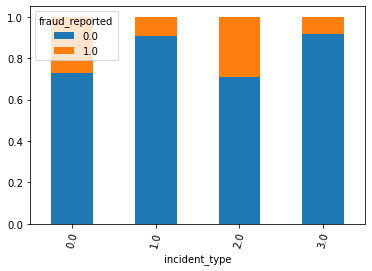

In [71]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

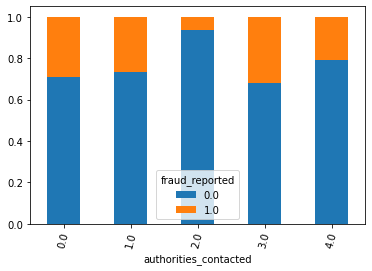

In [72]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()


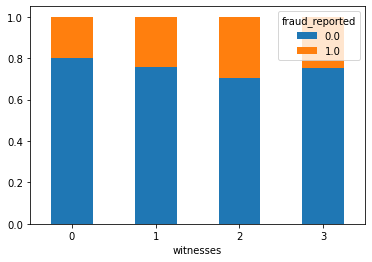

In [73]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

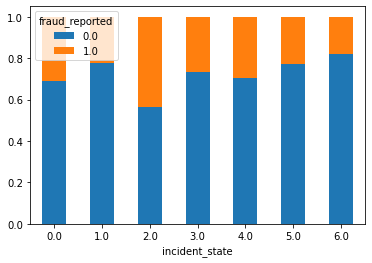

In [74]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

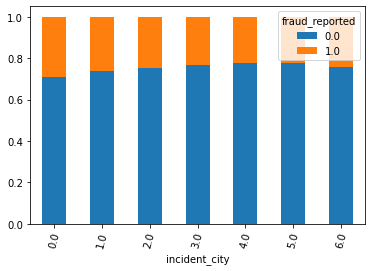

In [75]:
ct = pd.crosstab(df.incident_city, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

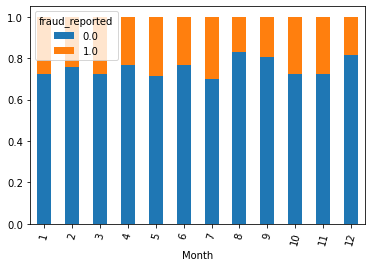

In [76]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

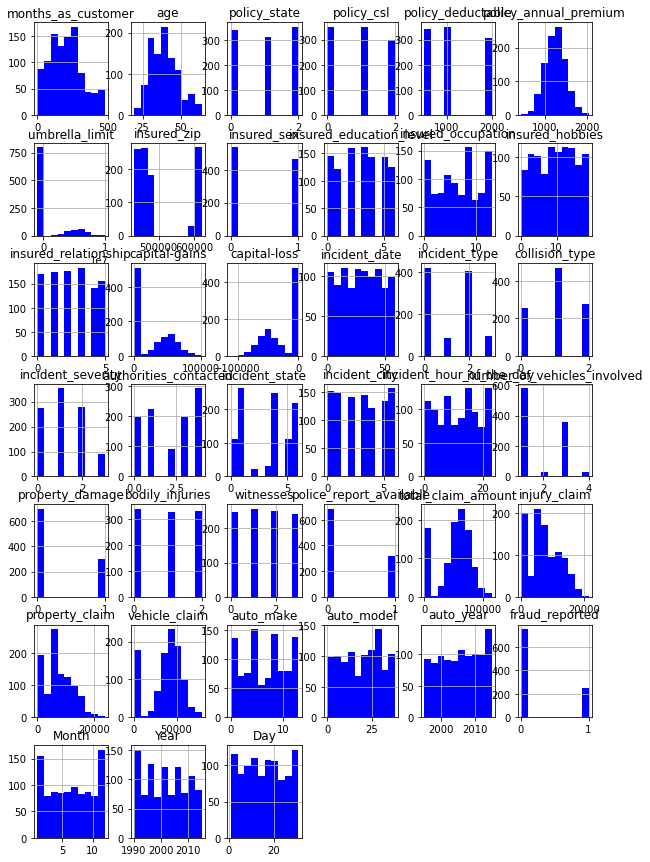

In [77]:
df.hist(figsize=(10,15),color = 'blue');


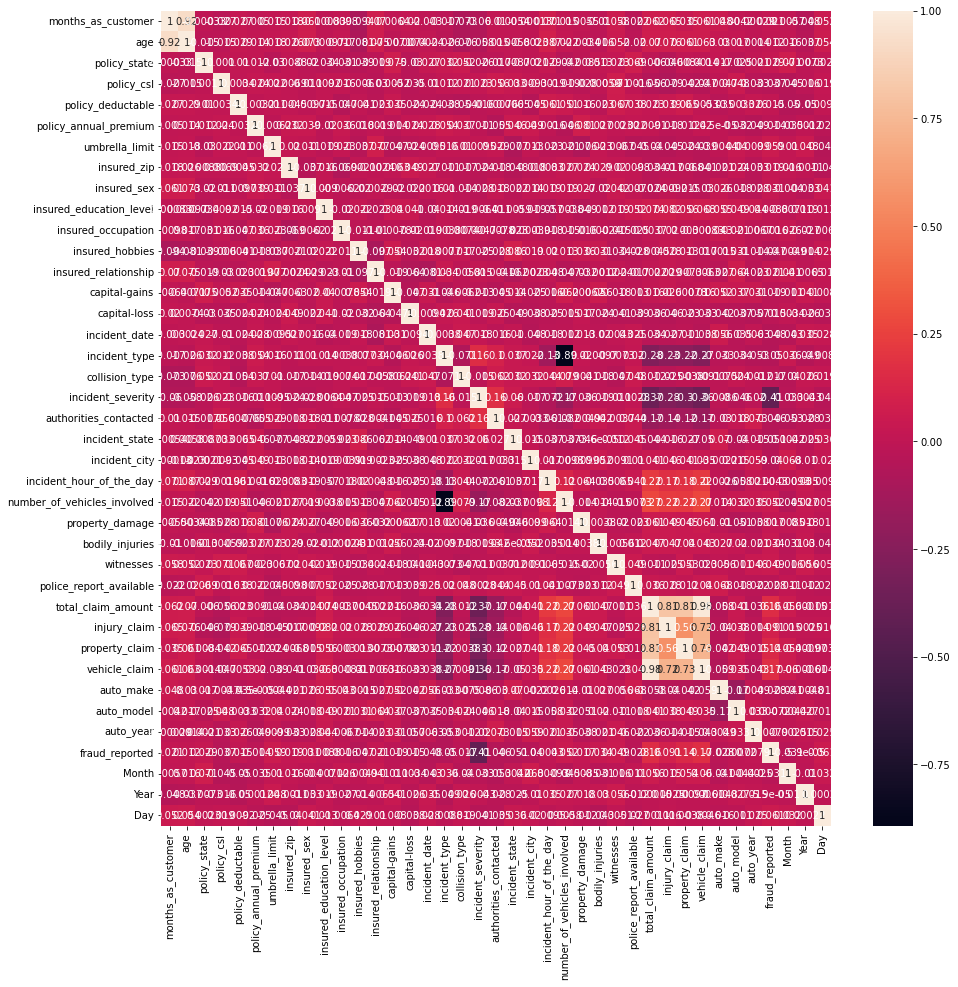

In [78]:
# Heatmap
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True,)
plt.show()

In [79]:
df.corr()['fraud_reported'].sort_values()


incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
Month                         -0.030829
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
Year                          -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368


Text(0.5, 0, 'fraud_data')

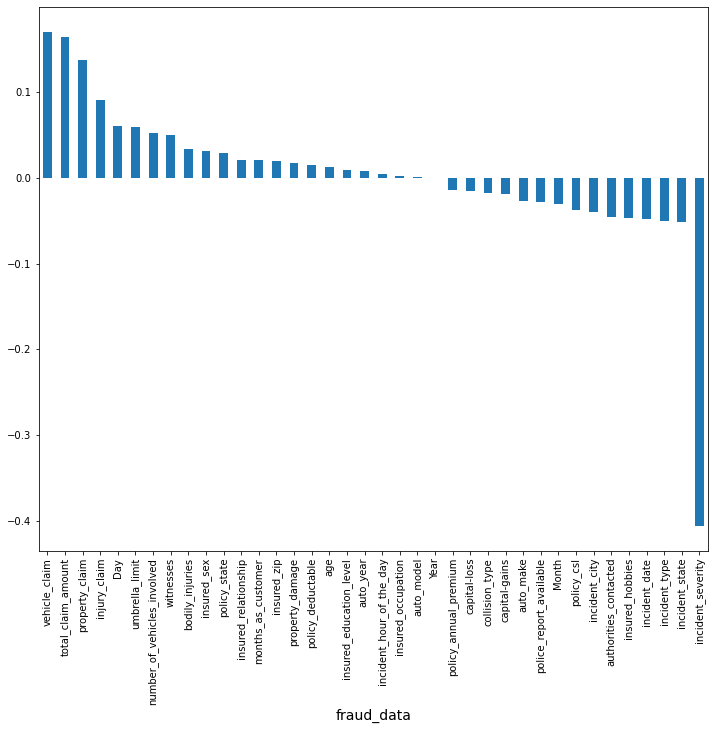

In [80]:
plt.figure(figsize=(12,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('fraud_data',fontsize=14)

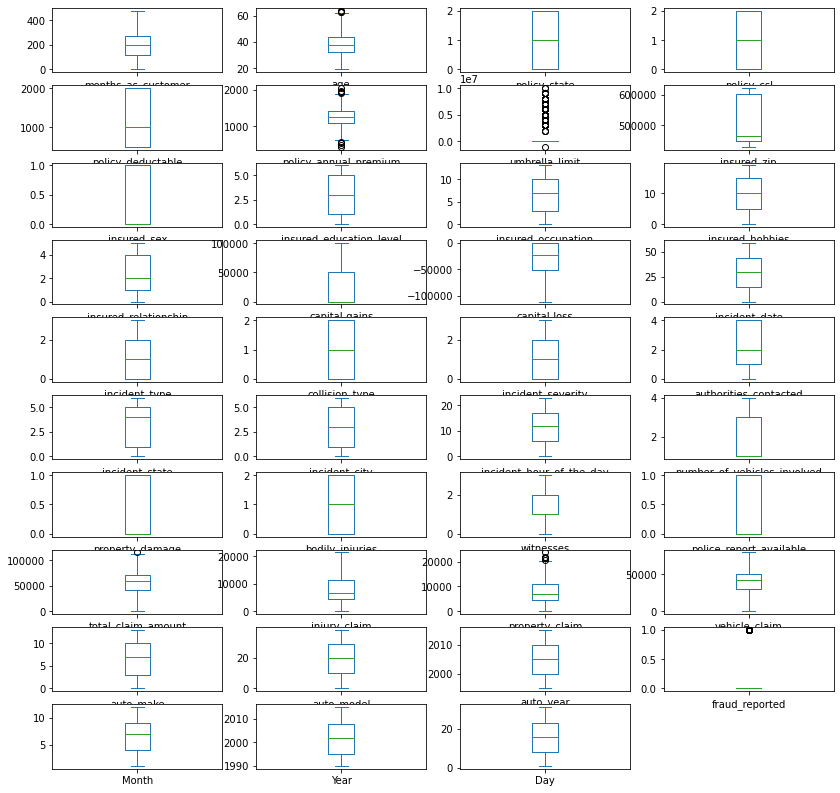

In [81]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(14,14))
plt.show()

<AxesSubplot:>

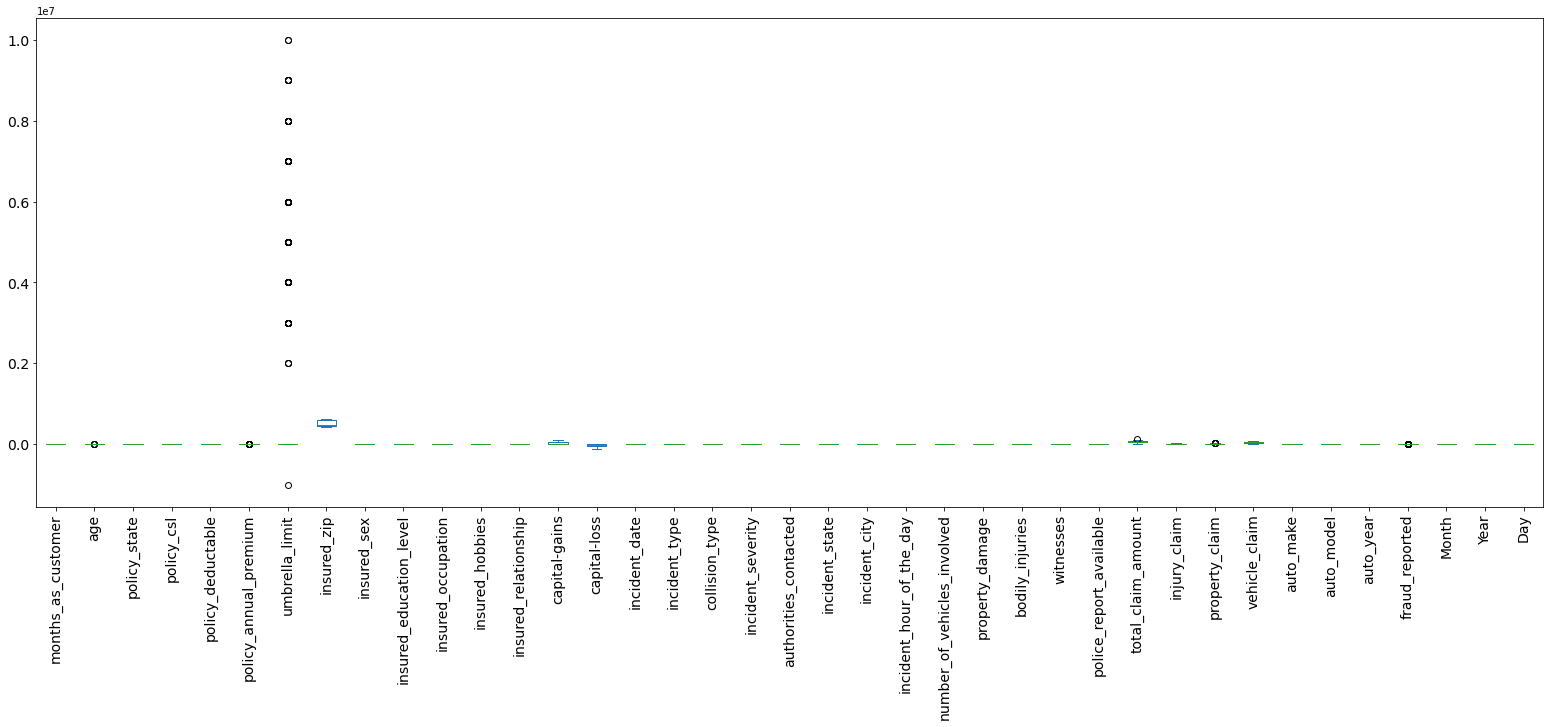

In [82]:
# lets check for the presence of outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(27,9))

In [83]:
# lets make a list of columns with outliers.
features=df[['age','policy_annual_premium','total_claim_amount','property_claim','vehicle_claim']]

In [84]:
# lets import all required libraries
from scipy.stats import zscore
# lets use zscore to remove outliers from the dataset
from scipy.stats import zscore
z=np.abs(zscore(features))
z  

,age,policy_annual_premium,total_claim_amount,property_claim,vehicle_claim
0,0.990836,0.616705,0.714257,1.165505,0.749653
1,0.334073,0.242521,1.807312,1.372696,1.823346
2,1.088913,0.642233,0.686362,0.736072,0.785565
3,0.224613,0.652886,0.403135,0.219722,0.677607
4,0.552994,1.341980,1.753121,1.399654,1.768252
...,...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817,1.224309
996,0.224613,0.739141,2.111466,2.214794,1.821868
997,0.541611,0.520739,0.558507,0.020826,0.771902
998,2.523284,0.411866,0.219110,0.451976,0.073580


In [85]:
# Creating new dataframe
newdf = df[(z<3).all(axis=1)] 
newdf

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,6510,13020,52080,10.0,1.0,2004,1.0,10,2014,17
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,780,780,3510,8.0,12.0,2007,1.0,6,2006,27
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,7700,3850,23100,4.0,30.0,2007,0.0,6,2000,9
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,6340,6340,50720,3.0,34.0,2014,1.0,5,1990,25
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,1300,650,4550,0.0,31.0,2009,0.0,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,17440,8720,61040,6.0,6.0,2006,0.0,7,1991,16
996,285,41,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,18080,18080,72320,13.0,28.0,2015,0.0,5,2014,1
997,130,34,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,7500,7500,52500,11.0,19.0,1996,0.0,2,2003,17
998,458,62,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,5220,5220,36540,1.0,5.0,1998,0.0,11,2011,18


In [86]:
print("Data Loss Percentage: ", ((df.shape[0]-newdf.shape[0])/df.shape[0]*100))

Data Loss Percentage:  0.4


In [87]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


In [88]:
columns=['umbrella_limit','insured_zip']
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [90]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2.0,1.0,1000,1406.91,0.000000,77.535925,1.0,4.0,...,6510,13020,52080,10.0,1.0,2004,1.0,10,2014,17
1,228,42,1.0,1.0,2000,1197.22,170.997595,77.649092,1.0,4.0,...,780,780,3510,8.0,12.0,2007,1.0,6,2006,27
2,134,29,2.0,0.0,2000,1413.14,170.997595,75.515384,0.0,6.0,...,7700,3850,23100,4.0,30.0,2007,0.0,6,2000,9
3,256,41,0.0,1.0,2000,1415.74,181.712059,84.721905,0.0,6.0,...,6340,6340,50720,3.0,34.0,2014,1.0,5,1990,25
4,228,44,0.0,2.0,1000,1583.91,181.712059,84.841967,1.0,0.0,...,1300,650,4550,0.0,31.0,2009,0.0,6,2014,6


In [91]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

x.shape,y.shape

((1000, 38), (1000, 1))

In [92]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()

X,Y=SM.fit_resample(x,y)

y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

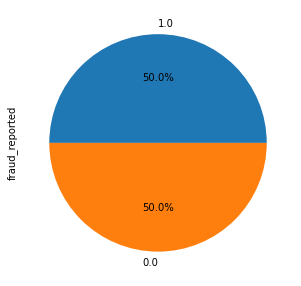

In [93]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.114061,1.046858,1.215873,0.078114,-0.247927,0.660661,-0.568237,-0.513060,1.133129,0.537894,...,0.658906,-0.247066,1.117574,0.692183,0.941110,-1.726230,-0.170147,1.158335,1.821229,0.165645
1,0.216970,0.369687,-0.063057,0.078114,1.482757,-0.258504,1.918264,-0.480135,1.133129,0.537894,...,-2.041658,-1.492536,-1.526545,-2.063820,0.415355,-0.684673,0.361106,-0.092393,0.664735,1.359813
2,-0.626296,-1.097519,1.215873,-1.248070,1.482757,0.687970,1.918264,-1.100928,-1.009719,1.626779,...,-0.841137,0.011592,-0.863355,-0.952226,-0.636156,1.019693,0.361106,-0.092393,-0.202636,-0.789689
3,0.468155,0.256825,-1.341987,0.078114,1.482757,0.699367,2.074064,1.577671,-1.009719,1.626779,...,0.325698,-0.284017,-0.325458,0.615013,-0.899033,1.398441,1.600697,-0.405075,-1.648254,1.120980
4,0.216970,0.595410,-1.341987,1.404297,-0.247927,1.436531,2.074064,1.612602,1.133129,-1.639876,...,-1.983620,-1.379509,-1.554628,-2.004807,-1.687666,1.114380,0.715275,-0.092393,1.821229,-1.147940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,1.679229,1.949754,-0.713508,-0.922220,1.057008,-0.788734,-0.568237,-0.262338,0.606621,-0.283446,...,0.604968,1.565277,-0.135790,0.472872,1.139398,-0.726323,-0.524316,-0.405075,-0.636321,1.240397
1502,1.060236,1.159720,0.750463,-0.765464,0.852788,-0.295061,0.271753,-1.003272,0.353335,-0.302931,...,-0.136490,-0.452688,-0.493092,0.056833,0.486129,0.176195,0.184022,0.220289,1.387543,0.404479
1503,0.916701,1.046858,0.911588,-0.932542,1.070854,-0.444631,-0.019051,-1.008421,0.623299,-0.577295,...,-0.145256,-0.441820,-0.482291,0.038902,0.916668,0.140408,0.184022,0.220289,1.387543,0.882146
1504,0.351534,-0.081761,-1.341987,-0.653652,-0.919432,0.867801,-0.568237,-0.367257,-0.529489,-0.607376,...,-1.431697,-1.160845,-1.196894,-1.384267,0.587632,-0.963911,0.184022,-0.405075,1.387543,1.120980


In [95]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)

#Checking the cumulative sum of the expalined variance ratio.

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([  9.98720104,  15.39685847,  20.0635893 ,  23.780773  ,
        27.35354782,  30.6971927 ,  33.98501393,  37.20326203,
        40.41297634,  43.47594093,  46.4917612 ,  49.44013604,
        52.3608154 ,  55.20976329,  57.96349746,  60.62308899,
        63.19462729,  65.74926437,  68.24163074,  70.70901622,
        73.09016995,  75.435441  ,  77.7278665 ,  80.01478579,
        82.22965257,  84.40781453,  86.50863022,  88.55624081,
        90.51895539,  92.41697099,  94.29001441,  96.09732878,
        97.77423958,  98.9303281 ,  99.51257979,  99.81665452,
       100.        , 100.        ])

In [96]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

finalx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.619768,1.090337,-0.485836,4.006540,0.036152,0.935191,-0.450392,0.363318,0.374453,1.182283,...,-0.098702,0.517287,0.398897,0.644976,0.484608,-1.917302,0.244661,0.006626,1.189596,0.021113
1,-4.177898,0.941351,-0.486311,-0.257643,-0.380939,1.461367,-1.091095,-0.703752,-0.282273,0.418591,...,0.055557,-0.121773,0.621053,-0.006300,0.985975,0.304754,-0.721457,-0.988778,0.448144,0.143695
2,-0.894440,-1.246120,1.159618,-2.083980,-0.696261,0.498090,0.844028,0.550550,-0.440271,1.271728,...,-1.381077,-0.779483,-0.872145,-0.696249,-0.763028,-0.899446,-1.329755,-1.506722,-0.399141,-0.472454
3,-0.050847,1.771414,-1.003803,-3.473469,-0.753556,2.150009,1.462904,1.057004,1.668510,0.474681,...,-0.335986,1.242237,-0.310543,-1.382794,-0.273349,-0.709189,0.695961,0.751021,-0.420443,-0.260102
4,-3.511661,1.475612,-0.095653,-2.390304,-0.096672,-2.582832,0.304572,-0.787200,1.178467,1.514115,...,0.586363,0.595321,0.588544,0.066654,2.738379,0.774880,1.499777,1.618117,-0.345353,0.808463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2.365924,1.991966,2.514874,0.957508,-0.687292,0.966452,-0.087108,-1.129913,-0.363924,-1.731648,...,0.820742,-0.029264,0.809875,1.267887,0.240207,0.330620,0.518658,0.879980,0.135776,0.473016
1502,-0.288810,1.952956,-0.159475,0.826503,-0.878337,-0.056351,1.047959,-1.090002,-0.347583,-0.811721,...,-1.214803,-0.192260,-1.357830,0.554432,-0.169047,1.160036,-0.900923,1.271681,-0.035392,-0.040922
1503,-0.348803,1.844381,-0.075333,1.018469,-0.882266,0.180004,1.076032,-1.209385,-0.368514,-0.934795,...,-1.433749,-0.157090,-1.291191,0.587167,-0.087262,1.281289,-1.127504,1.575189,0.194360,-0.375381
1504,-2.597287,-0.780070,1.217131,1.247261,-0.957189,-0.058470,-2.335347,-0.942112,0.388109,0.385214,...,-0.691523,-0.605313,-1.185210,0.326581,-0.089798,-0.291216,0.177152,0.210286,0.346439,-0.007190


In [97]:
#reassign x to finalx
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.619768,1.090337,-0.485836,4.006540,0.036152,0.935191,-0.450392,0.363318,0.374453,1.182283,...,-0.098702,0.517287,0.398897,0.644976,0.484608,-1.917302,0.244661,0.006626,1.189596,0.021113
1,-4.177898,0.941351,-0.486311,-0.257643,-0.380939,1.461367,-1.091095,-0.703752,-0.282273,0.418591,...,0.055557,-0.121773,0.621053,-0.006300,0.985975,0.304754,-0.721457,-0.988778,0.448144,0.143695
2,-0.894440,-1.246120,1.159618,-2.083980,-0.696261,0.498090,0.844028,0.550550,-0.440271,1.271728,...,-1.381077,-0.779483,-0.872145,-0.696249,-0.763028,-0.899446,-1.329755,-1.506722,-0.399141,-0.472454
3,-0.050847,1.771414,-1.003803,-3.473469,-0.753556,2.150009,1.462904,1.057004,1.668510,0.474681,...,-0.335986,1.242237,-0.310543,-1.382794,-0.273349,-0.709189,0.695961,0.751021,-0.420443,-0.260102
4,-3.511661,1.475612,-0.095653,-2.390304,-0.096672,-2.582832,0.304572,-0.787200,1.178467,1.514115,...,0.586363,0.595321,0.588544,0.066654,2.738379,0.774880,1.499777,1.618117,-0.345353,0.808463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2.365924,1.991966,2.514874,0.957508,-0.687292,0.966452,-0.087108,-1.129913,-0.363924,-1.731648,...,0.820742,-0.029264,0.809875,1.267887,0.240207,0.330620,0.518658,0.879980,0.135776,0.473016
1502,-0.288810,1.952956,-0.159475,0.826503,-0.878337,-0.056351,1.047959,-1.090002,-0.347583,-0.811721,...,-1.214803,-0.192260,-1.357830,0.554432,-0.169047,1.160036,-0.900923,1.271681,-0.035392,-0.040922
1503,-0.348803,1.844381,-0.075333,1.018469,-0.882266,0.180004,1.076032,-1.209385,-0.368514,-0.934795,...,-1.433749,-0.157090,-1.291191,0.587167,-0.087262,1.281289,-1.127504,1.575189,0.194360,-0.375381
1504,-2.597287,-0.780070,1.217131,1.247261,-0.957189,-0.058470,-2.335347,-0.942112,0.388109,0.385214,...,-0.691523,-0.605313,-1.185210,0.326581,-0.089798,-0.291216,0.177152,0.210286,0.346439,-0.007190


In [98]:
y=y_new
x.shape,y.shape

((1506, 32), (1506, 1))

In [99]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [100]:
#check the best possible random state to train our model
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.7947019867549668  on Random state 187


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=130)

In [102]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.7718832891246684
[[149  58]
 [ 28 142]]
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       207
         1.0       0.71      0.84      0.77       170

    accuracy                           0.77       377
   macro avg       0.78      0.78      0.77       377
weighted avg       0.78      0.77      0.77       377

Accuracy score of SVC(probability=True)
0.8753315649867374
[[180  27]
 [ 20 150]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       207
         1.0       0.85      0.88      0.86       170

    accuracy                           0.88       377
   macro avg       0.87      0.88      0.87       377
weighted avg       0.88      0.88      0.88       377

Accuracy score of KNeighborsClassifier()
0.5755968169761273
[[ 50 157]
 [  3 167]]
              precision    recall  f1-score   support

         0.0       0.94      0.24      0.38  

In [103]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())

Mean Accuracy of LogisticRegression()
0.7417086532749555
Mean Accuracy of SVC(probability=True)
0.8453609381531759
Mean Accuracy of KNeighborsClassifier()
0.6315042573320719
Mean Accuracy of RandomForestClassifier()
0.8672548458779783
Mean Accuracy of DecisionTreeClassifier()
0.7516974323997271
Mean Accuracy of GaussianNB()
0.7942333502013158
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7776418560647731


In [104]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC score of LogisticRegression()
0.7775504404660416


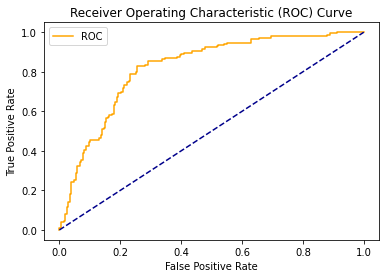

ROC_AUC score of SVC(probability=True)
0.8759590792838875


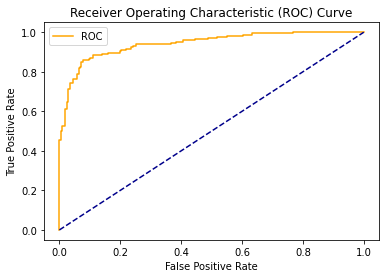

ROC_AUC score of KNeighborsClassifier()
0.6119494174481386


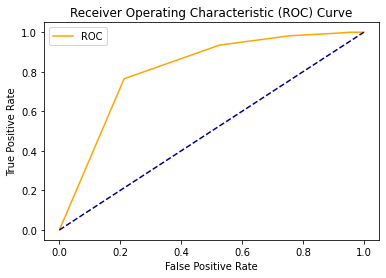

ROC_AUC score of RandomForestClassifier()
0.8702898550724637


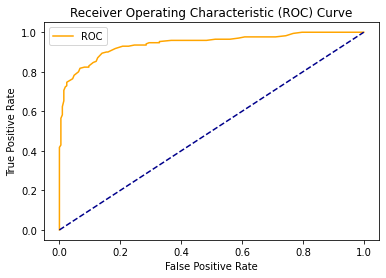

ROC_AUC score of DecisionTreeClassifier()
0.7405797101449275


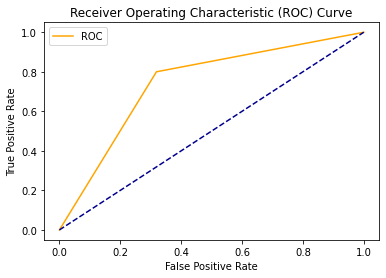

ROC_AUC score of GaussianNB()
0.8293265132139813


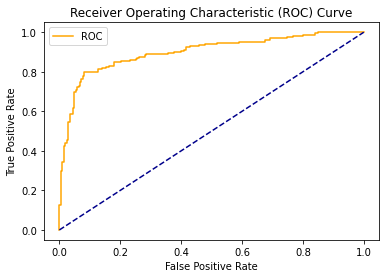

ROC_AUC score of AdaBoostClassifier(n_estimators=100)
0.7839585109406082


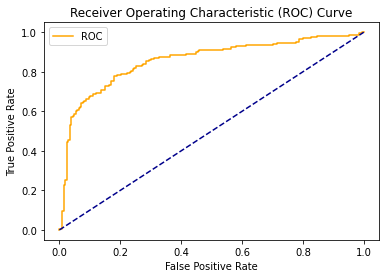

In [105]:
auc = []
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score = roc_auc_score(y_test,pred)
    auc.append(score)
    print('ROC_AUC score of', m)
    print(score)
    probs = m.predict_proba(x_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)

In [106]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.771883,0.741709,0.777550
1,SVC,0.875332,0.845361,0.875959
2,KNeighborsClassifier,0.575597,0.631504,0.611949
3,RandomForestClassifier,0.864721,0.867255,0.870290
4,DecisionTreeClassifier,0.748011,0.751697,0.740580
5,GaussianNB,0.827586,0.794233,0.829327
6,AdaBoostClassifier,0.777188,0.777642,0.783959


We can conclude that Random Forest Classifier and GaussianNB has performed well with less overfitting and underfitting.Now,Lets Hypertune the RandomForest model to check if we can improve the accuracy

In [107]:
from sklearn.model_selection import GridSearchCV
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [109]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 84.88063660477454
Cross Validation Score 87.12283558117534
AUC ROC Score 85.07530548451265


AUC ROC Curve with Final Mod


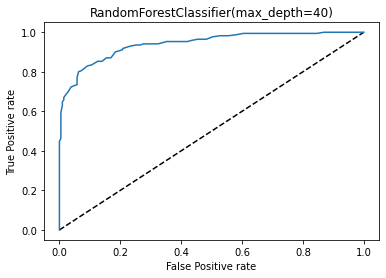

In [112]:
Finalmod=RandomForestClassifier(max_features= 'auto', min_samples_leaf= 1, min_samples_split=2,n_estimators=100,max_depth=40,criterion='gini')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

In [113]:
import joblib
joblib.dump(Finalmod,'fraud detection.obj')

['fraud detection.obj']